## Import Modules

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [ ]:
df=pd.read_csv("data.csv")
df

In [ ]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap  
plt.show()

## Data Visualization 

In [ ]:
df.columns

In [ ]:
mag="magma" 

In [ ]:
sns.countplot(x="Gender",data=df,palette=mag)

In [ ]:
sns.countplot(x="Level",data=df,hue="Gender",palette=mag)

In [ ]:
sns.jointplot(x="Level",y="Age",data=df,kind='scatter')

In [ ]:
df["Obesity"].value_counts()

In [ ]:
sns.countplot(x="Level",hue="Obesity",data=df)

In [ ]:
sns.set(rc={'figure.figsize':(9,6.27)})

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(columns='Level', axis =1)
Y = df['Level']

In [ ]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

## Dropping one of any Highly Co-related Values

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))


In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
train_data=Y_test
train_data
train_data.to_csv("testy.csv")

In [ ]:
train_data.columns

## Checking co-relation again just to confirm

In [ ]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))

## Logistic Regression model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

In [ ]:

input_data = (62,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not Lung Cancer')
else:
  print('The Person has Lung Cancer Disease')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_prediction))

## Confusion Matrix explained

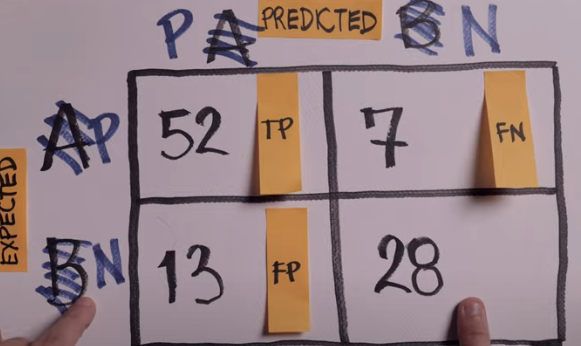

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cm, annot=True)

## For my Reference

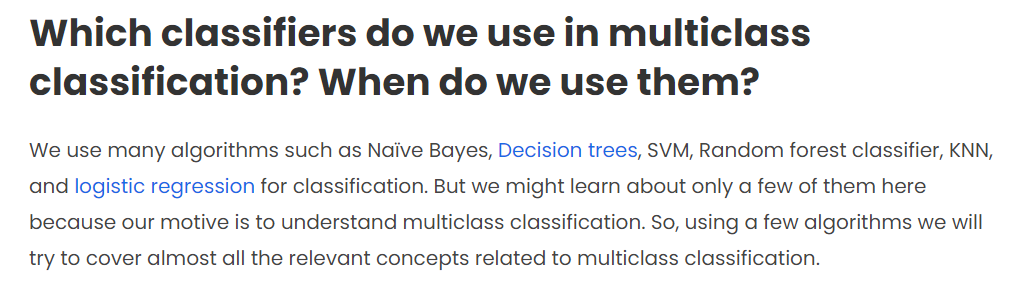

## Support Vector Machine SVM

In [ ]:
from sklearn import svm
from sklearn import metrics # for checking the model accuracy

In [ ]:
classifier = svm.SVC(kernel='linear')

# we train the algorithm with training data and training output
classifier.fit(X_train, Y_train)

# we pass the testing data to the stored algorithm to predict the outcome
prediction_svm = classifier.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction_svm, Y_test)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_svm))

## 100% Accuracy is obtained from svm and logistic

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dis_tree = DecisionTreeClassifier()
dis_tree.fit(X_train, Y_train)
prediction_dis = dis_tree.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction_dis, Y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_dis))

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN classifier

In [ ]:
knn_m = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
knn_m.fit(X_train, Y_train)
prediction1 = knn_m.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction1))

In [ ]:
prediction1

In [ ]:
display(pd.DataFrame({"Predicted":prediction1,"Actual":Y_test}))

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, prediction1) 
sns.heatmap(cm, annot=True)

## Summarizing all Predictions

In [ ]:
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(X_test_prediction, Y_test))
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction_svm, Y_test))
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction_dis, Y_test))
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

In [ ]:
import pickle
filename = "final_model.sav"
pickle.dump(classifier , open(filename,'wb'))